In [3]:
import pandas as pd

In [4]:
data = pd.read_csv('/content/customer_churn.csv')
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
data.shape

(7043, 21)

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
data.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [10]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [11]:
len(data)*0.10

704.3000000000001

In [12]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [13]:
data.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [19]:
for ifc in data.select_dtypes(include=['float64','int64']).columns: # Exclude 'object' type for skewness calculation
  if (data[ifc].skew()>0.5):
    print(ifc,'skewd')
    data[ifc] = data[ifc].fillna(data[ifc].median())
  else:
    print(ifc,'Normal')
    data[ifc] = data[ifc].fillna(data[ifc].mean())

SeniorCitizen skewd
tenure Normal
MonthlyCharges Normal


In [20]:
data.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [21]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


SeniorCitizen


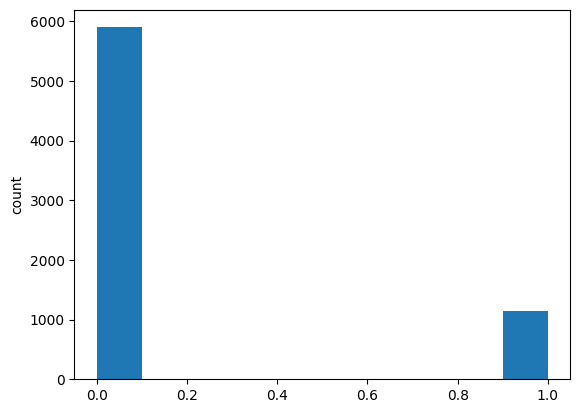

tenure


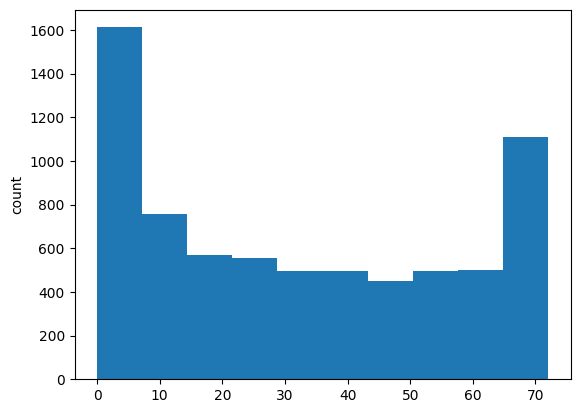

MonthlyCharges


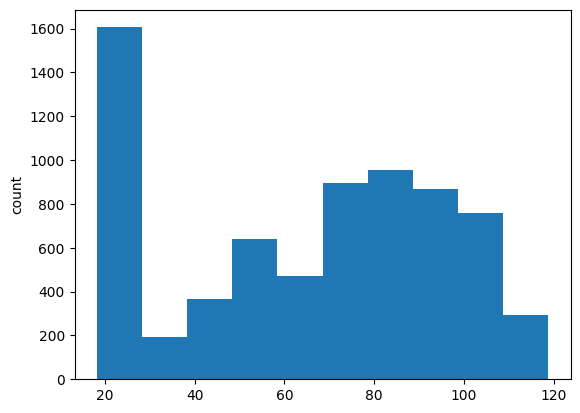

In [23]:
for i in data.select_dtypes(include=['float64','int64']).columns:
  plt.hist(data[i])
  print(i)
  plt.ylabel('count')
  plt.show()

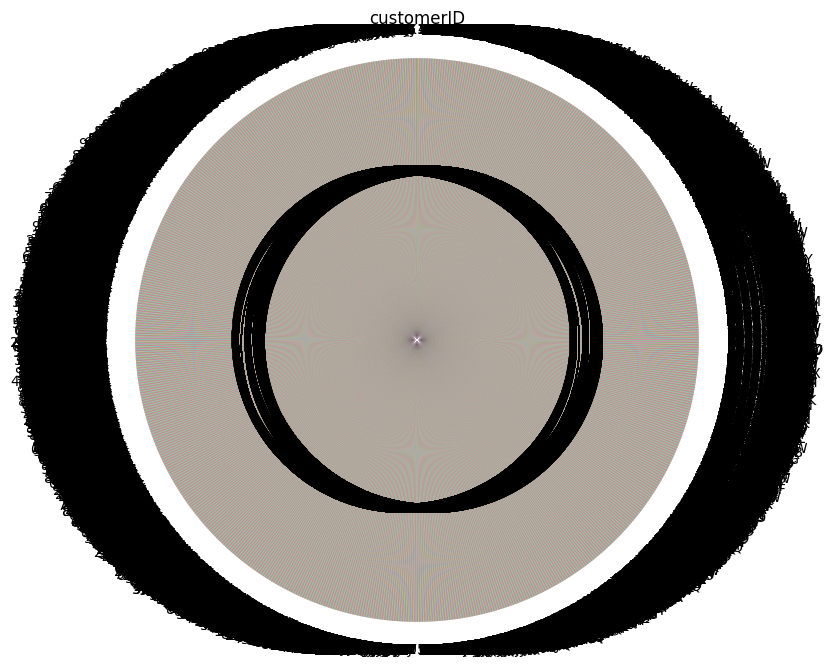

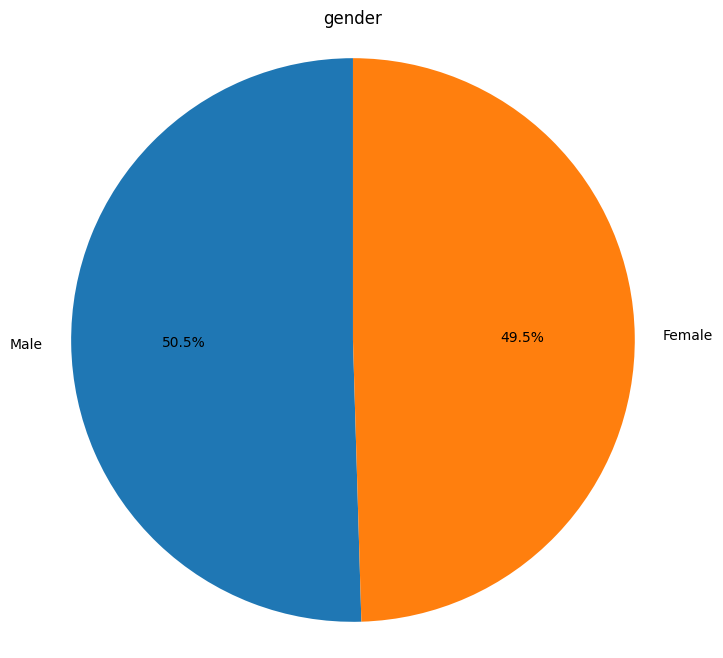

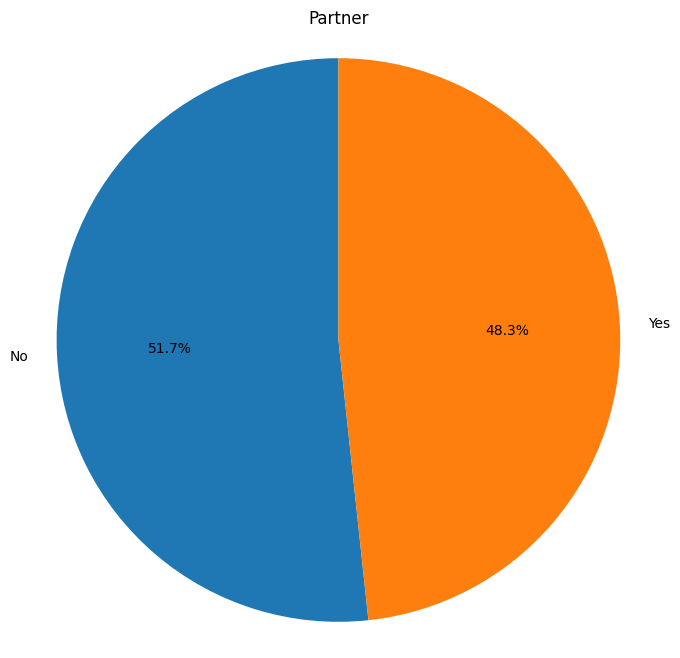

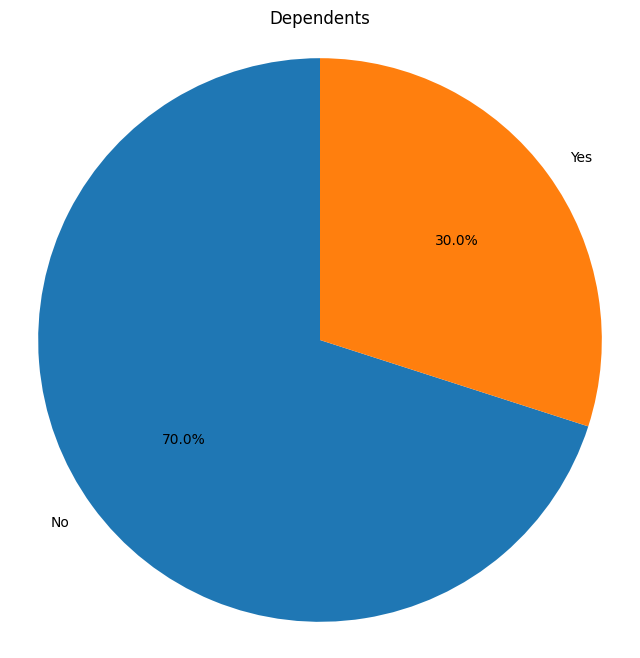

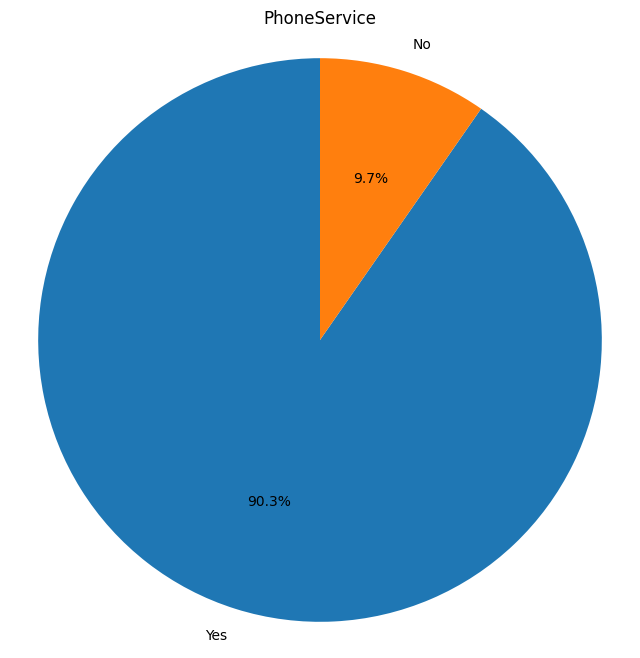

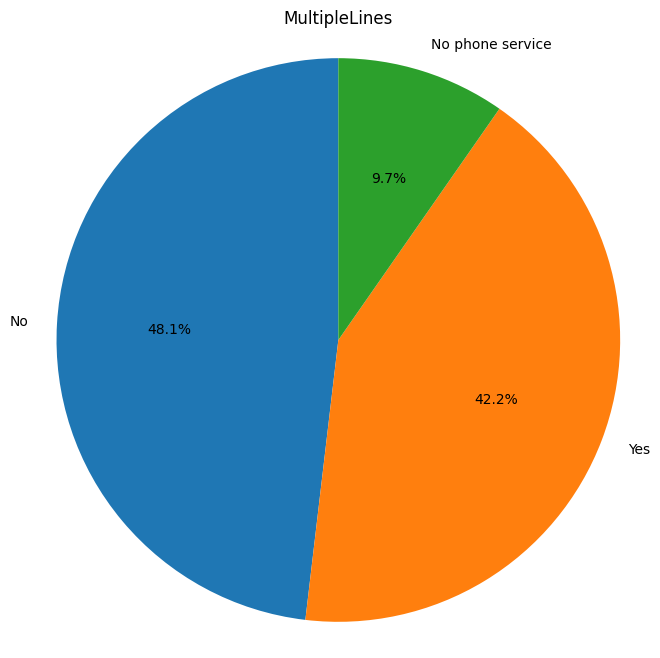

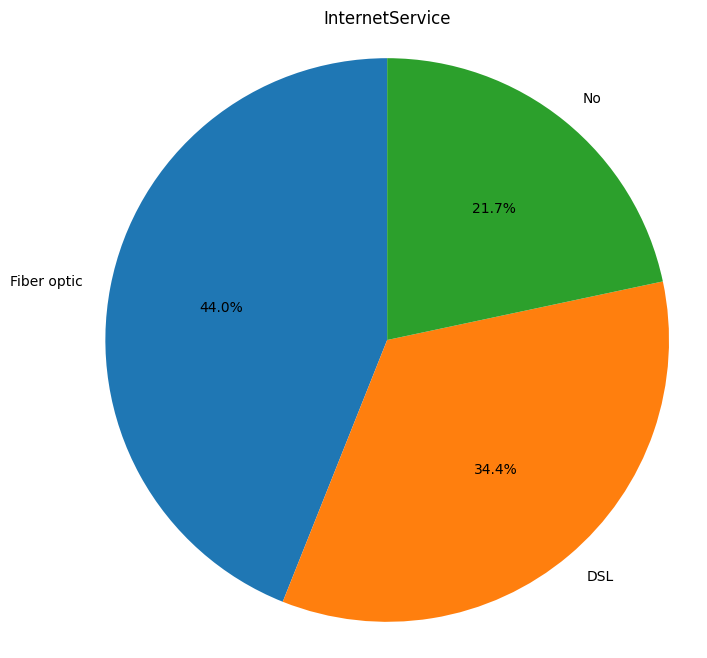

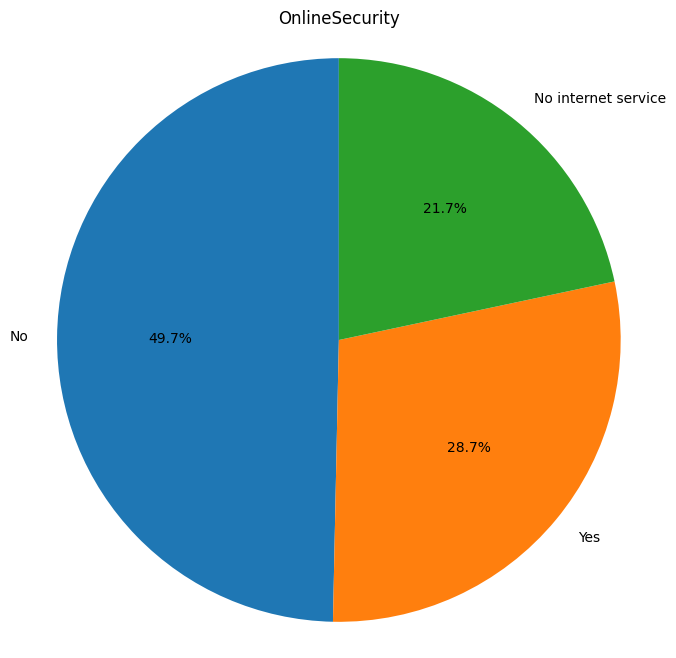

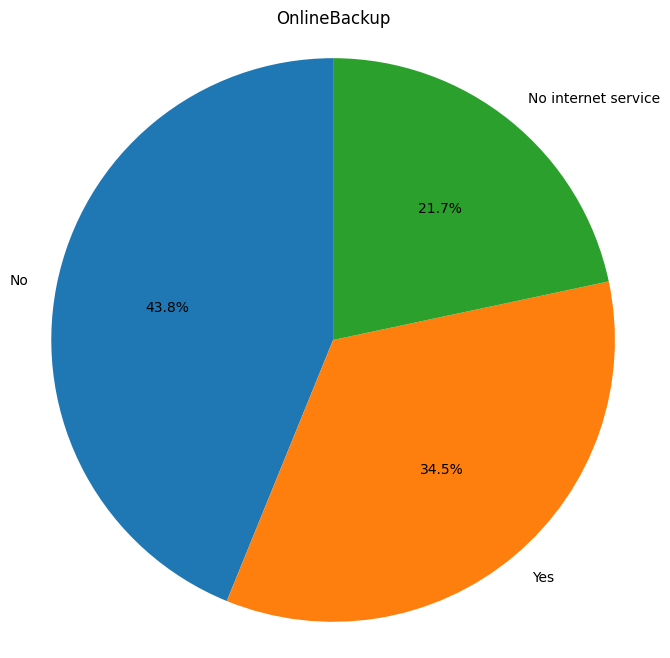

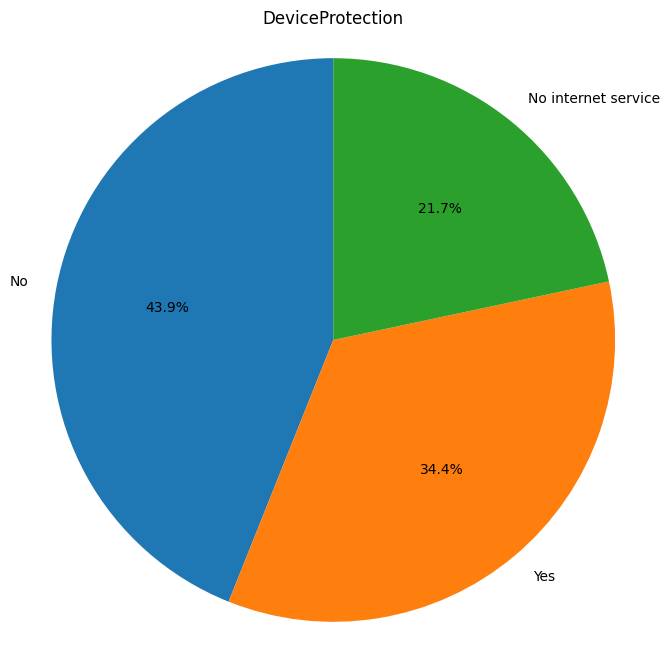

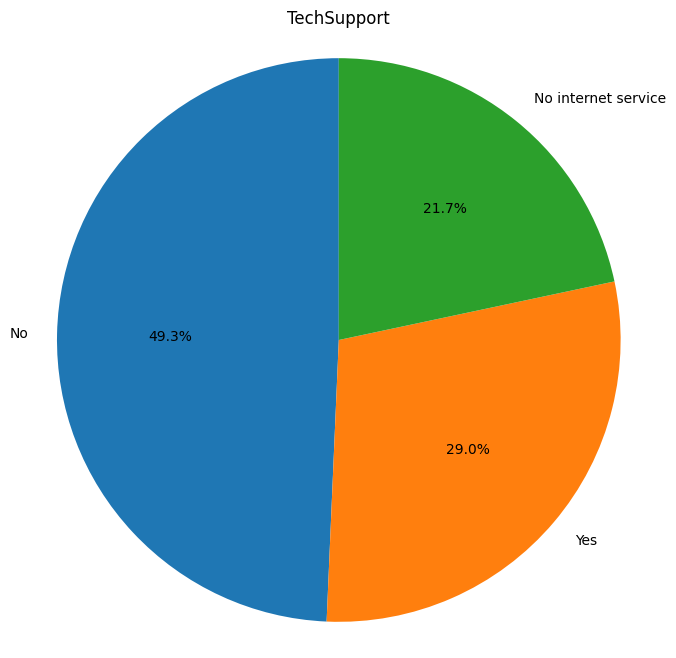

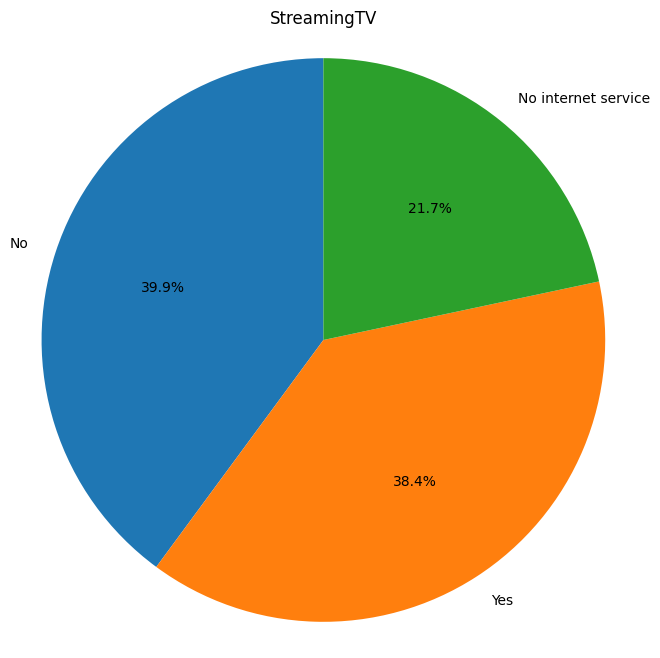

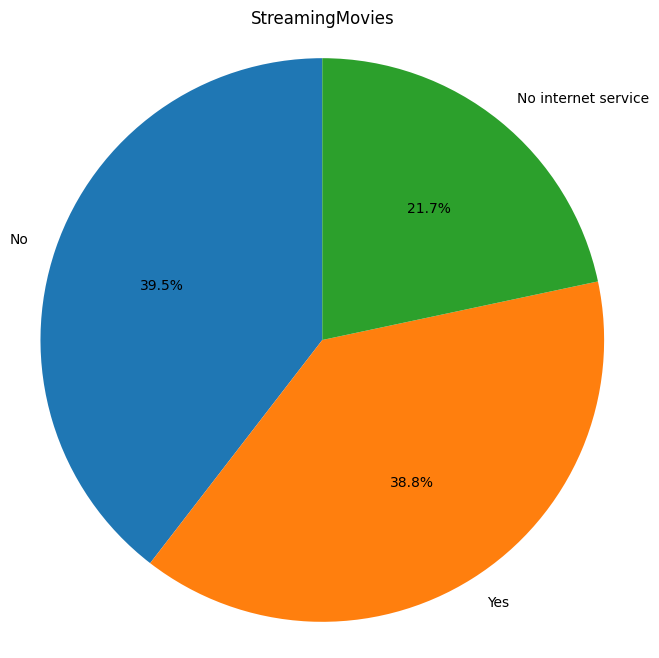

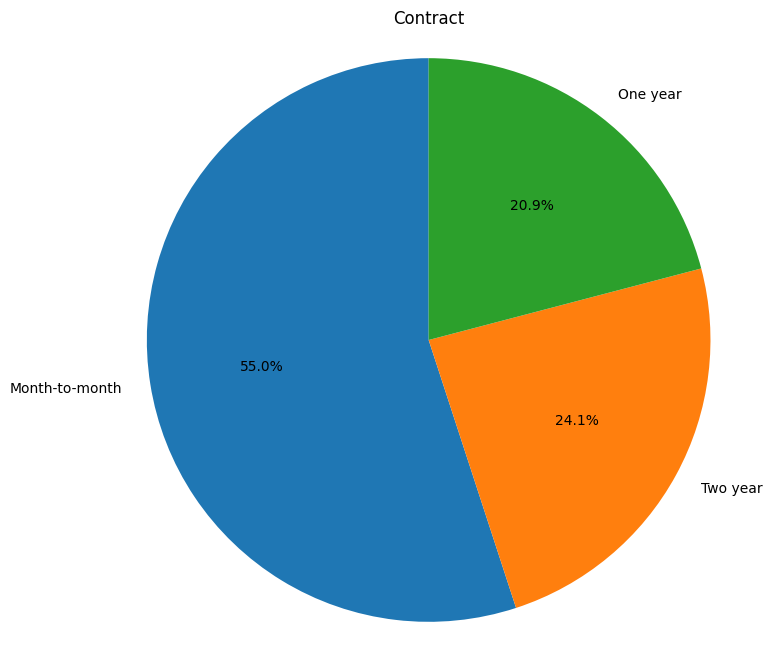

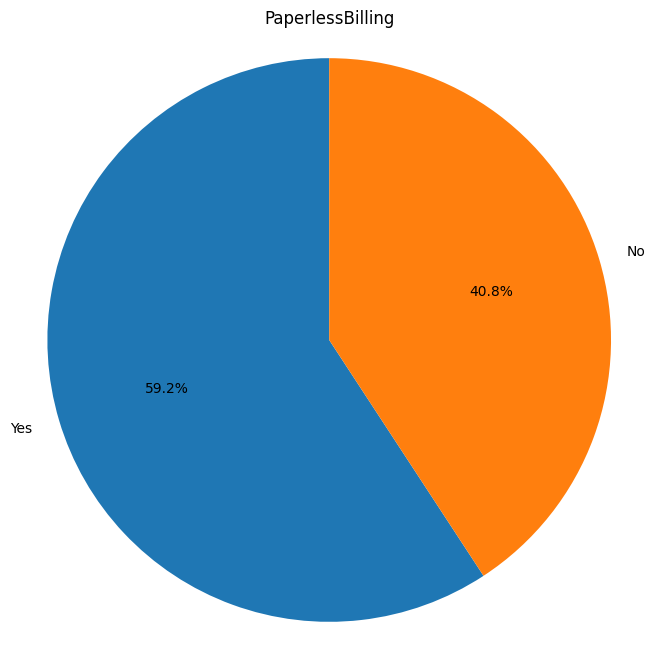

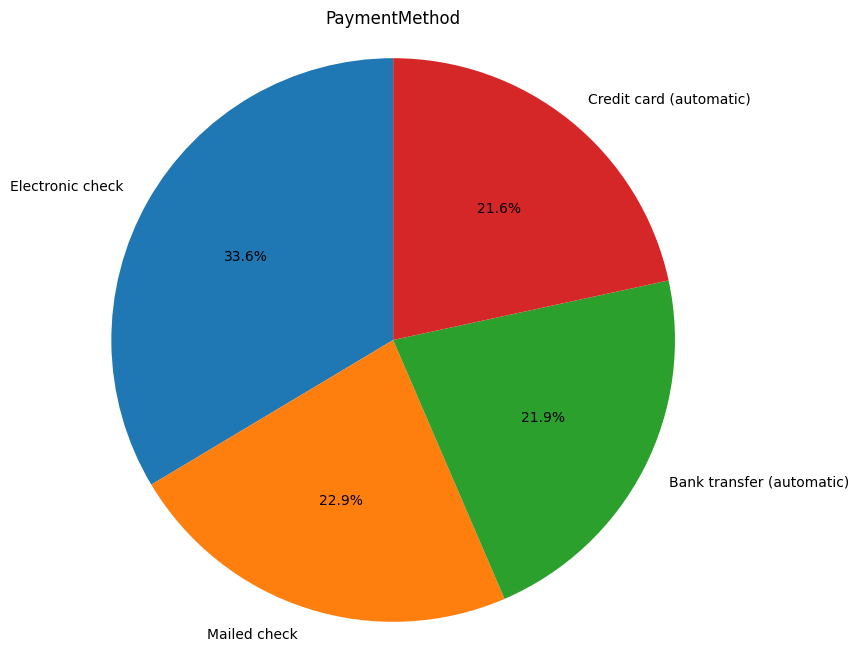

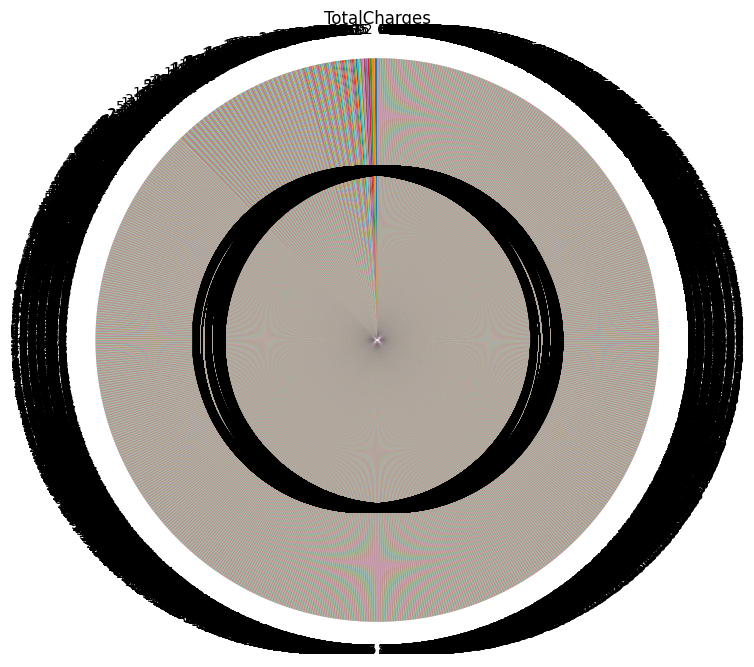

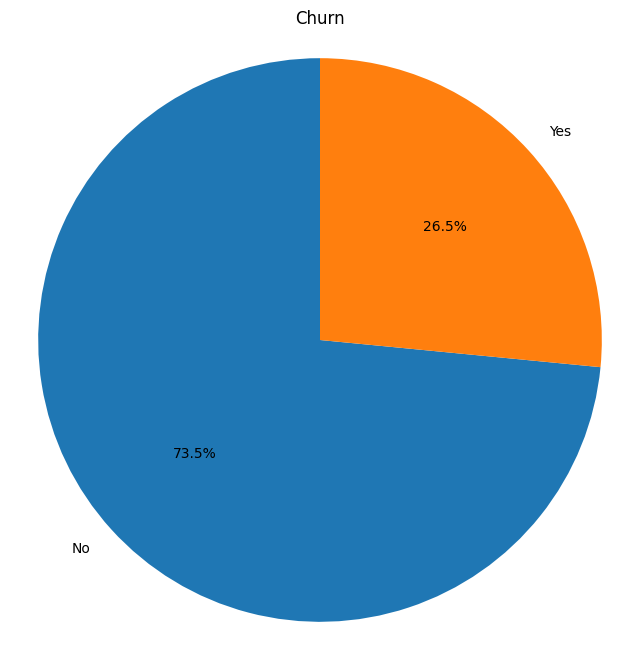

In [24]:
for i in data.select_dtypes(include='object_'):
  plt.figure(figsize=(8,8))
  cnt=data[i].value_counts()
  plt.title(i)
  plt.pie(cnt,labels=cnt.index,autopct='%1.1f%%',startangle=90)
  plt.axis('equal')
  plt.show()

In [25]:
y=data.iloc[:,-1]
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


SeniorCitizen


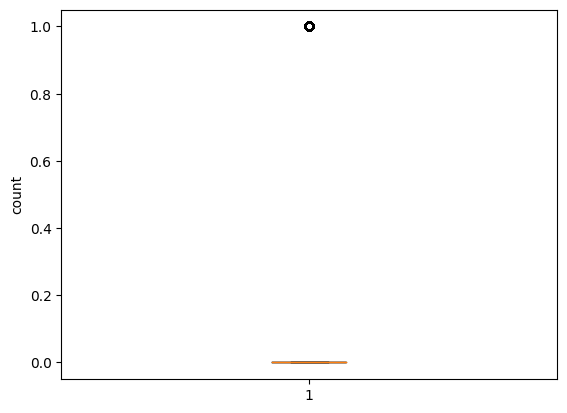

tenure


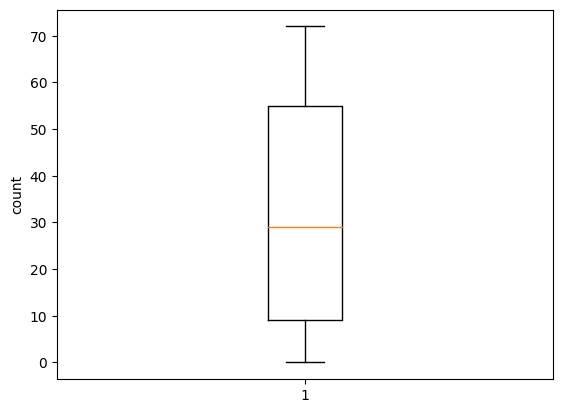

MonthlyCharges


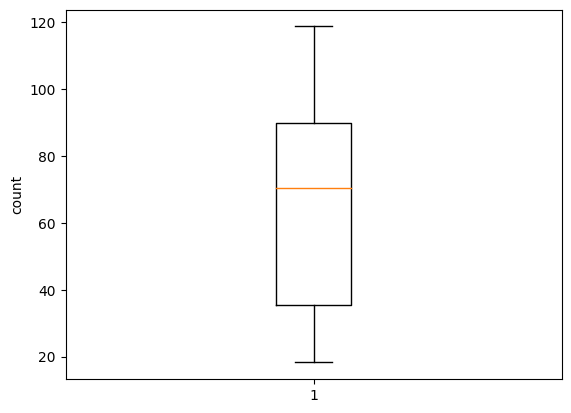

In [27]:
for i in data.select_dtypes(include=['float64','int64']).columns:
    plt.boxplot(data[i])
    print(i)
    plt.ylabel("count")
    plt.show()

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges'], dtype='object')


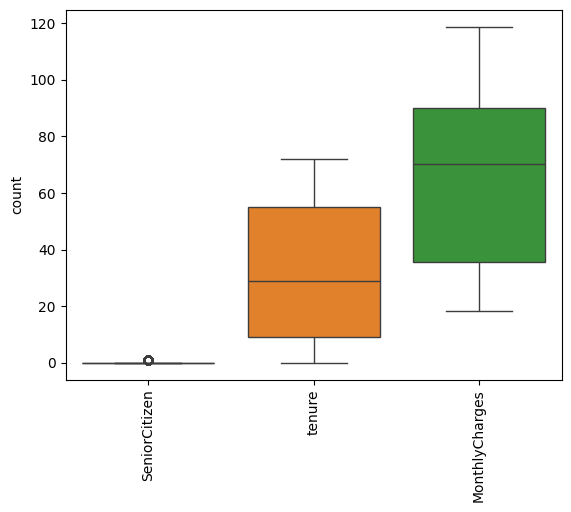

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Use the DataFrame 'data' to select columns
ddd = data.select_dtypes(include=['float64','int64']).columns
print(ddd)
sns.boxplot(data[ddd])
plt.xticks(rotation='vertical')
plt.ylabel("count")
plt.show()

In [33]:
outlier_list=['MonthlyCharges','tenure']
for i in outlier_list:
  Q1=data[i].quantile(0.25)
  Q3=data[i].quantile(0.75)
  IQR=Q3-Q1
  data=data[(data[i]>=Q1-1.5*IQR) & (data[i]<=Q3+1.5*IQR)]

In [31]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [34]:
data.shape

(7043, 21)

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
  if((data[i].dtype!='object')&(i!='charges')):
    var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,SeniorCitizen,1.256364
1,tenure,2.617403
2,MonthlyCharges,2.924996


In [38]:
data=data.drop(['MonthlyCharges'],axis=1)

In [39]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
var_inflation=[]
for i in data.columns:
  if((data[i].dtype!='object')&(i!='charges')):
    var_inflation.append(i)
x=data[var_inflation]
vif_data=pd.DataFrame()
vif_data['feature']=x.columns
vif_data['VIF']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif_data

,feature,VIF
0,SeniorCitizen,1.122184
1,tenure,1.122184


In [40]:
data=data.drop(['tenure'],axis=1)

In [43]:
x

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [44]:
y=data.iloc[:,-1]
y

,Churn
0,No
1,No
2,Yes
3,No
4,Yes
...,...
7038,No
7039,No
7040,No
7041,Yes


In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [46]:
x

,SeniorCitizen
0,0
1,0
2,0
3,0
4,0
...,...
7038,0
7039,0
7040,0
7041,1


In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.80,random_state=999)
x_train

,SeniorCitizen
3049,0
5470,1
2078,0
1985,0
2466,0
...,...
5832,0
481,0
4965,0
4444,0


In [48]:
x_test.shape

(5635, 1)

In [49]:
x_test

,SeniorCitizen
4210,1
2099,0
5302,0
2791,0
3471,0
...,...
3387,0
4740,1
4520,0
4943,0


In [50]:
y_test.shape

(5635,)

In [51]:
y_test

,Churn
4210,No
2099,No
5302,No
2791,No
3471,No
...,...
3387,No
4740,Yes
4520,Yes
4943,No


In [54]:
import pandas as pd
from sklearn.linear_model import LinearRegression
y_train = y_train.replace('Yes', 1).replace('No', 0)
l_model = LinearRegression()
l_model.fit(x_train, y_train)

LinearRegression()

In [55]:
predictions=l_model.predict(x_test)
predictions

array([0.4109589 , 0.25063078, 0.25063078, ..., 0.25063078, 0.25063078,
       0.25063078])

In [58]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
predictions = l_model.predict(x_test)
r2score = r2_score(x_test, predictions)
print(r2score)

0.20156905270687953


In [59]:
x_test

,SeniorCitizen
4210,1
2099,0
5302,0
2791,0
3471,0
...,...
3387,0
4740,1
4520,0
4943,0


In [65]:
import pandas as pd
from sklearn.linear_model import LinearRegression
y_train = y_train.replace('Yes', 1).replace('No', 0)
l_model = LinearRegression()
l_model.fit(x_train, y_train)
print(x_train.shape) # Print the shape of your training data

(1408, 1)


In [66]:
y_test

,Churn
4210,No
2099,No
5302,No
2791,No
3471,No
...,...
3387,No
4740,Yes
4520,Yes
4943,No


In [69]:
a=l_model.predict([[0.4109589]])
a

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([0.31651905])